In [ ]:
from google.colab import drive

# Mount Google Drive ke file sistem di Colab
drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
# Import pustaka
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Unduh resource yang dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Baca dataset
file_path = '/content/drive/MyDrive/Dataset/ar/CISI_ALL.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ID                                              Query
0   1  .T 18 Editions of the Dewey Decimal Classifica...
1   2  .T Use Made of Technical Libraries .A Slater, ...
2   3  .T Two Kinds of Power An Essay on Bibliographi...
3   4  .T Systems Analysis of a University Library; f...
4   5  .T A Library Management Game: a report on a re...


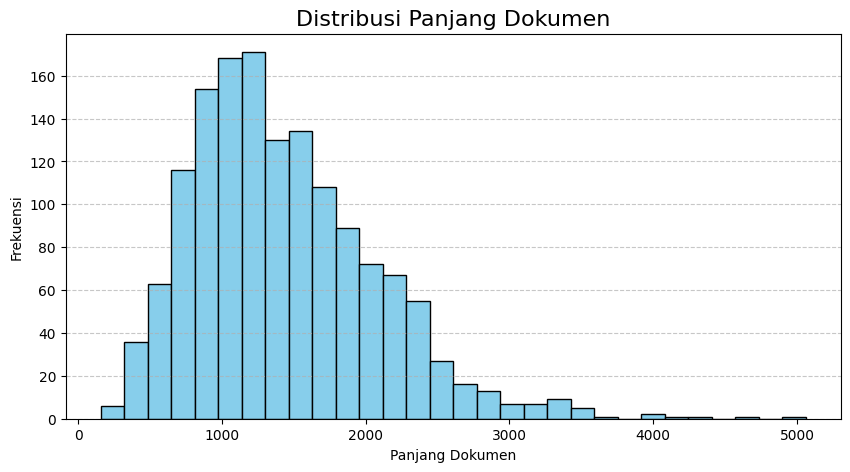

In [24]:
import matplotlib.pyplot as plt

# Hitung panjang teks untuk setiap dokumen
# Change 'text_column' to 'Query'
data['text_length'] = data['Query'].apply(lambda x: len(str(x)))

# Plot distribusi panjang teks
plt.figure(figsize=(10, 5))
plt.hist(data['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Panjang Dokumen", fontsize=16)
plt.xlabel("Panjang Dokumen")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

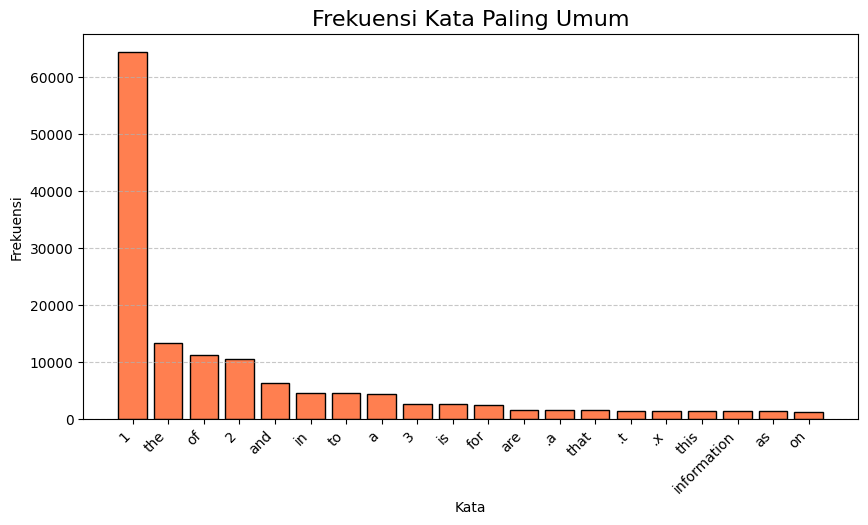

In [25]:
from collections import Counter

# Gabungkan semua teks dalam dataset
# Change 'text_column' to 'Query' as that's where the actual text data is stored
all_words = ' '.join(data['Query']).lower().split()

# Hitung frekuensi kata
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)  # Top 20 kata paling umum

# Pisahkan kata dan frekuensinya
words, counts = zip(*most_common_words)

# Plot frekuensi kata
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='coral', edgecolor='black')
plt.title("Frekuensi Kata Paling Umum", fontsize=16)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()